In [17]:
import numpy as npy #library numpy diimport sebagai npy
import matplotlib.pyplot as plt #library matplotlib sebagai plt
import os
import cv2
# from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D #Activation, Dropout, 
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from PIL import Image
import pandas as pd
from io import StringIO
from tabulate import tabulate


In [18]:
# !pip3 list
base_size = 224

#### #1. load image

In [19]:
def load_images(_directory):
    result = []
    for filename in os.listdir(_directory):
        # Membuka gambar menggunakan PIL dan menyimpannya ke variabel _image
        _image = Image.open(os.path.join(_directory, filename))
        if _image is not None:
            # Menambahkan gambar ke dalam list result
            result.append(_image)
    return result

def load_image(_directory):
    return Image.open(_directory)

def load_filenames(_directory):
    result = []
    for filename in os.listdir(_directory):
        result.append(filename)
    return result

#### #2. preprocessing

In [20]:
def images_preproccess(_images, num_iterations):
    result = []
    for _image in _images:
        # resize memperkecil ukuran
        _resized = _image.resize((base_size, base_size))
        # convert to rgb
        _resized = _resized.convert("RGB")
        # normalized
        _normalized = npy.array(_resized) / 255
        for _ in range(num_iterations):

            # Penerapan filter Gaussian, menghilangkan noise
            #terdapat 3 parameter didalamnya yaitu image source, kernel, dan juga sigmax
            # sigmaX: Ini adalah parameter yang mengontrol penyebaran Gaussian dalam sumbu X (horizontal) dari kernel. 
            # Semakin besar nilai sigmaX, semakin besar penyebaran Gaussian, sehingga efek pengaburan akan semakin besar. 
            # Jika sigmaX bernilai 0, maka OpenCV secara otomatis menghitung nilai sigmaX berdasarkan ukuran kernel yang diberikan. 
            # Pada contoh kode, nilai sigmaX diberikan sebagai 0, yang berarti OpenCV akan menghitungnya secara otomatis.
            _blurred = cv2.GaussianBlur(_normalized, (5, 5), 0)
            # sharpened, menajamkan
            #terdapat 5 parameter yaitu imgsource1, alpha, imgsource2, beta, gamma
            #alpha adalah bobot untuk imgsource1, semakin besar bobotnaya maka akan semakin besar pula dampaknya dalam image
            #beta adalah bobot untuk imgsource2, semakin besar bobotnaya maka akan semakin besar pula dampaknya dalam image
            # Nilai gamma dalam cv2.addWeighted mengontrol penyesuaian atau bias yang diterapkan pada gambar hasil penggabungan. 
            # Jika gamma diatur ke 0, tidak ada faktor penyesuaian yang diterapkan. 
            # Namun, jika gamma tidak diatur ke 0, faktor penyesuaian akan diterapkan dan mempengaruhi hasil penggabungan.
            _sharpened = cv2.addWeighted(_normalized, 1.5, _blurred, -0.5, 0)
            normalisasi = _sharpened
            result.append(normalisasi)
    return npy.array(result)
def image_preproccess(image, num_iterations):    
    resized = image.resize((base_size, base_size))
    resized = resized.convert("RGB")
    normalized = npy.array(resized) / 255.0
    
    for _ in range(num_iterations):
        blurred = cv2.GaussianBlur(normalized, (5, 5), 0)
        sharpened = cv2.addWeighted(normalized, 1.5, blurred, -0.5, 0)
        normalized = sharpened
    
    return normalized

##### # coba buat 1 image, dengan beberapa kali proses preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


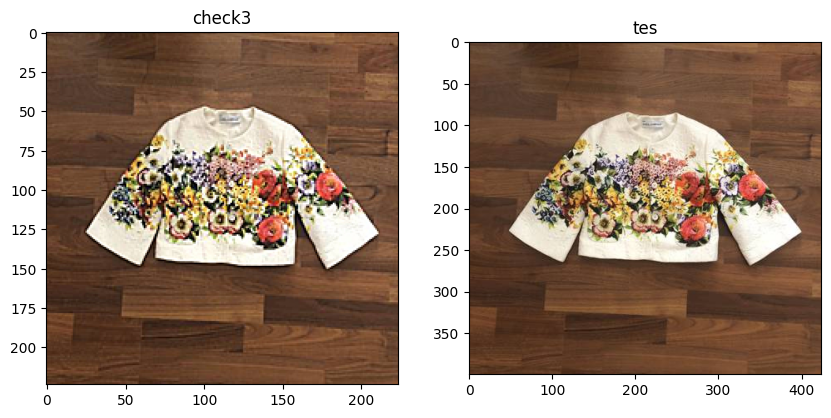

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=424x400 at 0x15A5FE910>


In [33]:
# Load dan preprocessing gambar
check3 = image_preproccess(load_image('./dataset/longsleeve/58d54528-9eb3-4188-beca-892932f360a7.jpg'), 2)

tes = load_image('./dataset/longsleeve/58d54528-9eb3-4188-beca-892932f360a7.jpg')

# Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan gambar check3 di subplot pertama
axes[0].imshow(check3)
axes[0].set_title('check3')

# Menampilkan gambar tes di subplot kedua
axes[1].imshow(tes)
axes[1].set_title('tes')

# Menampilkan plot
plt.show()
print(tes)

#### #3. input dataset for kids

In [22]:
dir = './test'

In [23]:

#type fashion, is either bocil fashion or not
kids_stuff = images_preproccess(load_images(dir + '/kids'), 1)
non_kids_stuff = []
for filename in load_filenames(dir):
    _dir = dir + '/' + filename
    if('kids' in filename or os.path.isdir(_dir) is False):
        continue
    _images = load_images(_dir)
    if _images is not None:
        # Menambahkan gambar-gambar non-kids ke dalam list non_kids_stuff
       non_kids_stuff = non_kids_stuff + _images
non_kids_stuff = images_preproccess(non_kids_stuff, 1)
# as 0
kids_labels = npy.zeros(len(kids_stuff))
# as 1
non_kids_labels = npy.ones(len(non_kids_stuff))
# Menggabungkan gambar-gambar kids dan non-kids menjadi satu array
iskids_images = npy.concatenate((kids_stuff, non_kids_stuff), axis=0)
# Menggabungkan label kids dan non-kids menjadi satu array
iskids_labels = npy.concatenate((kids_labels, non_kids_labels), axis=0)
# Membagi dataset menjadi data latih dan data uji
train_kids, test_kids, train_kids_label, test_kids_label = train_test_split(iskids_images, iskids_labels, test_size=0.2, random_state=42)

#### #4. input dataset for other folder

In [24]:
#label fashion
# Memuat dan memproses gambar-gambar dari masing-masing kategori fashion
hat_stuff = images_preproccess(load_images(dir + '/hat'), 1)
tshirt_stuff = images_preproccess(load_images(dir + '/t-shirt'), 1)
dress_stuff = images_preproccess(load_images(dir + '/dress'), 1)
longsleeve_stuff = images_preproccess(load_images(dir + '/longsleeve'), 1)
outwear_stuff = images_preproccess(load_images(dir + '/outwear'), 1)
shorts_stuff = images_preproccess(load_images(dir + '/shorts'), 1)
pants_stuff = images_preproccess(load_images(dir + '/pants'), 1)
skirt_stuff = images_preproccess(load_images(dir + '/skirt'), 1)
shoes_stuff = images_preproccess(load_images(dir + '/shoes'), 1)
shirt_stuff = images_preproccess(load_images(dir + '/shirt'), 1)

# Menentukan label untuk masing-masing kategori fashion
hat_labels = npy.zeros(len(hat_stuff)) # as 0
tshirt_labels = npy.ones(len(tshirt_stuff)) # as 1
dress_labels = npy.full(len(dress_stuff), 2) # as 2
longsleeve_labels = npy.full(len(longsleeve_stuff), 3) # as 3
outwear_labels = npy.full(len(outwear_stuff), 4) # as  4
shorts_labels = npy.full(len(shorts_stuff), 5) # as 5
pants_labels = npy.full(len(pants_stuff), 6) # as 6
skirt_labels = npy.full(len(skirt_stuff), 7) # as 7
shoes_labels = npy.full(len(shoes_stuff), 8) # as 8
shirt_labels = npy.full(len(shirt_stuff), 9) # as 9

# Menggabungkan gambar-gambar dari masing-masing kategori menjadi satu array
lbl_images = npy.concatenate((hat_stuff, tshirt_stuff, dress_stuff, 
longsleeve_stuff,
outwear_stuff,
shorts_stuff,
pants_stuff,
skirt_stuff,
shoes_stuff,
shirt_stuff
), axis=0)

# Menggabungkan label dari masing-masing kategori menjadi satu array
lbl_labels = npy.concatenate((hat_labels, tshirt_labels, dress_labels,
longsleeve_labels,
outwear_labels,
shorts_labels,
pants_labels,
skirt_labels,
shoes_labels,
shirt_labels
), axis=0)

# Membagi dataset menjadi data latih dan data uji
train_lbl, test_lbl, train_lbl_label, test_lbl_label = train_test_split(lbl_images, lbl_labels, test_size=0.2, random_state=42)

# merge all
# splitting data train (80%) and data test (20%)
# train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

#### #5. klasifikasi dataset untuk folder selain kids

In [25]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(base_size, base_size, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### #6. klasifikasi dataset untuk folder kids

In [26]:
model_kids = Sequential()
model_kids.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(base_size, base_size, 3)))
model_kids.add(MaxPooling2D(2, 2))

model_kids.add(Conv2D(32, (3, 3), 1, activation='relu'))
model_kids.add(MaxPooling2D(2, 2))

model_kids.add(Conv2D(16, (3, 3), 1, activation='relu'))
model_kids.add(MaxPooling2D(2, 2))

model_kids.add(Flatten())
model_kids.add(Dense(64, activation='relu'))
model_kids.add(Dense(2, activation='sigmoid'))

#### #7. kompilasi model neural network

In [27]:
# Mengompilasi model untuk klasifikasi fashion anak-anak
model_kids.compile(optimizer=tf.optimizers.Adam(0.001),  
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# Mengompilasi model untuk klasifikasi fashion umum
model.compile(optimizer=tf.optimizers.Adam(0.001),  
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# model.summary()

#### #8. training model selain folder kids

In [28]:
model.fit(train_lbl, train_lbl_label, epochs=10, batch_size=10, verbose=0)

#### #9. training model folder kids

In [29]:
model_kids.fit(train_kids, train_kids_label, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
18/18 [==============================] - 4s 196ms/step - loss: 0.4158 - accuracy: 0.9080
Epoch 2/10
18/18 [==============================] - 3s 188ms/step - loss: 0.2903 - accuracy: 0.9195
Epoch 3/10
18/18 [==============================] - 4s 236ms/step - loss: 0.2801 - accuracy: 0.9195
Epoch 4/10
18/18 [==============================] - 6s 356ms/step - loss: 0.3004 - accuracy: 0.9195
Epoch 5/10
18/18 [==============================] - 3s 165ms/step - loss: 0.2377 - accuracy: 0.9195
Epoch 6/10
18/18 [==============================] - 3s 171ms/step - loss: 0.1816 - accuracy: 0.9195
Epoch 7/10
18/18 [==============================] - 4s 202ms/step - loss: 0.2568 - accuracy: 0.9195
Epoch 8/10
18/18 [==============================] - 6s 318ms/step - loss: 0.1728 - accuracy: 0.9195
Epoch 9/10
18/18 [==============================] - 10s 535ms/step - loss: 0.1419 - accuracy: 0.9195
Epoch 10/10
18/18 [==============================] - 5s 280ms/step - loss: 0.1713 - accuracy: 0.919

#### #10. tes predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 181ms/step
predicted as longslevee
val [[2.0435212e-04 1.5172407e-04 1.9156926e-04 1.0370906e-04 4.0193463e-08
  3.1234725e-07 1.6986239e-07 7.3669269e-04 9.9859577e-01 1.5536854e-05]]
val 0.9985958
val 4.0193463e-08
val 4


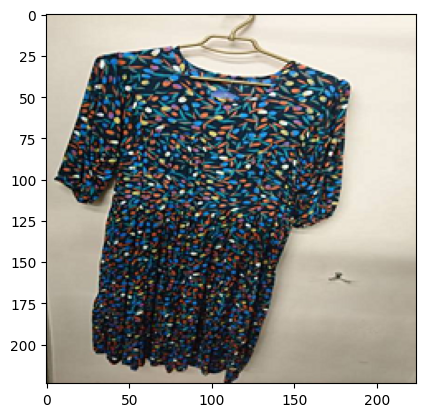

In [30]:
#test predict
# trying = npy.expand_dims(hat_images[0], 0)
check = image_preproccess(load_image('./dataset/dress/5a2b4bbf-d9fe-45a2-aa0d-295a86804cb6.jpg'), 1)
# status_labels = ['kids', 'non-kids']
plt.imshow(check)
predictions = model.predict(npy.expand_dims(check, 0))
if(npy.argmax(predictions) < 1):
    print('predicted as hat')
elif(npy.argmax(predictions) < 2):
    print('predicted as t-shirt')
elif(npy.argmax(predictions) < 3):
    print('predicted as dress')
else:
    print('predicted as longslevee')
print("val", predictions)
print("val", npy.max(predictions))
print("val", npy.min(predictions))
print("val", npy.argmin(predictions))

#### #11. Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

+-----+------------------------------------------+----------------------+------------+------------+---------+-------------------+--------------+
|     | Image                                    | Folder Path          | label      |   accurate |   state | is kids fashion   |   state kids |
|-----+------------------------------------------+----------------------+------------+------------+---------+-------------------+--------------|
|   0 | 35f157d0-53e4-4496-b087-da4ad63edd47.jpg | ./dataset/dress      | skirt      |   0.776919 |       6 | True              |            1 |
|   1 | d9afe9d4-8bb3-4449-9e4b-85fcf030ba1b.jpg | ./dataset/dress      | dress      |   0.978629 |       2 | True              |            1 |
|   2 | 5a2b4bbf-d9fe-45a2-aa0d-295a86804cb6.jpg | ./dataset/dress      | shirt      |   0.998596 |       8 | True              |            1 |
|   3 | 28b09463-6bbb-491d-9ffc-f36df5c6b211.jpg | ./dataset/dress      | dress      |   0.420579 |       2 | True              | 

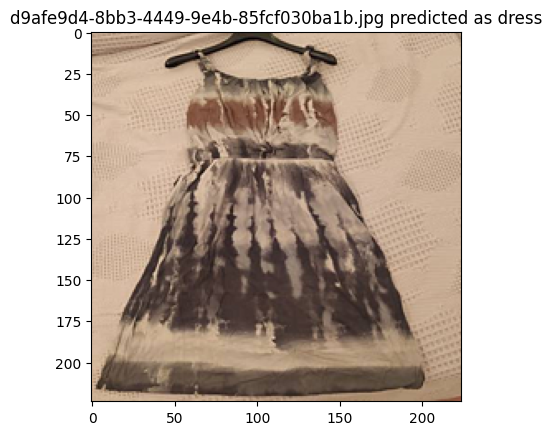

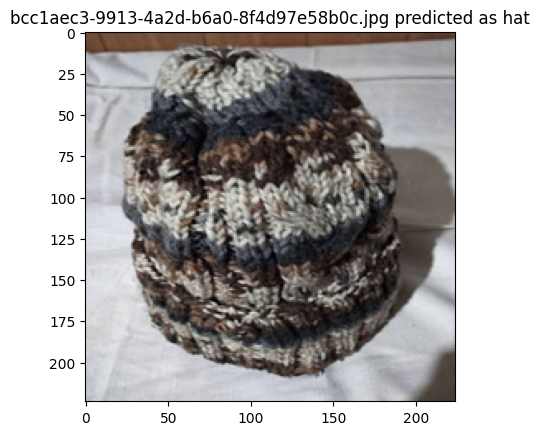

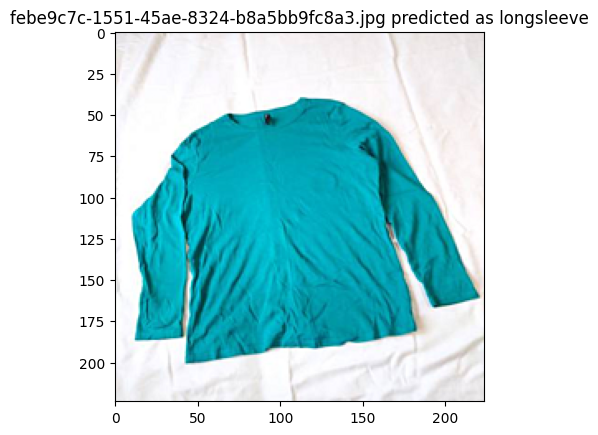

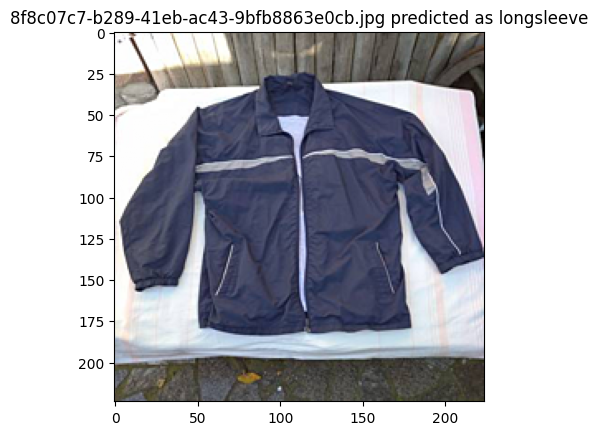

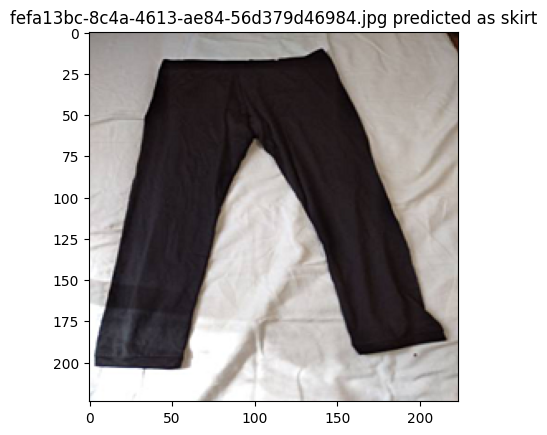

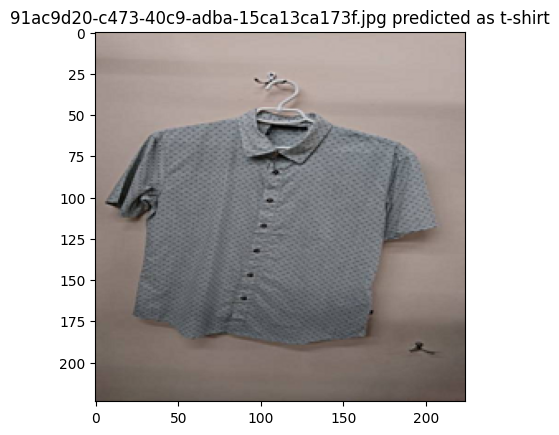

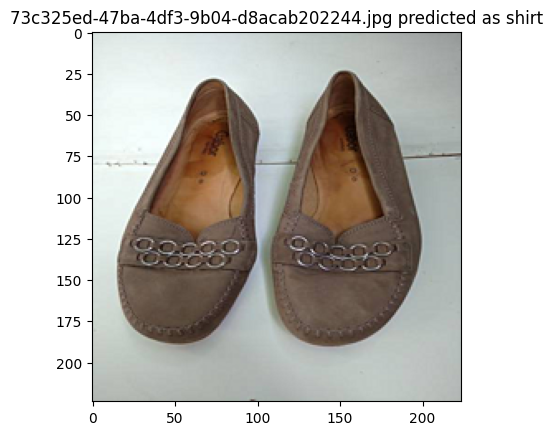

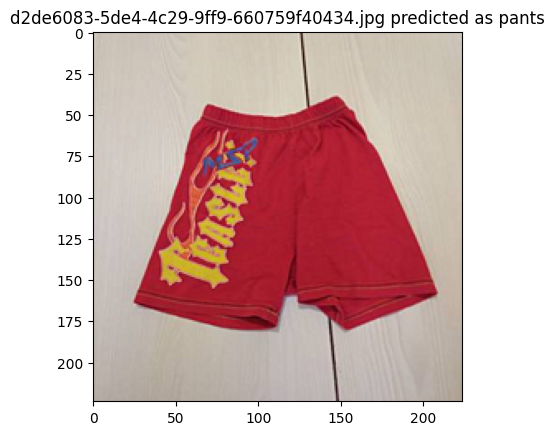

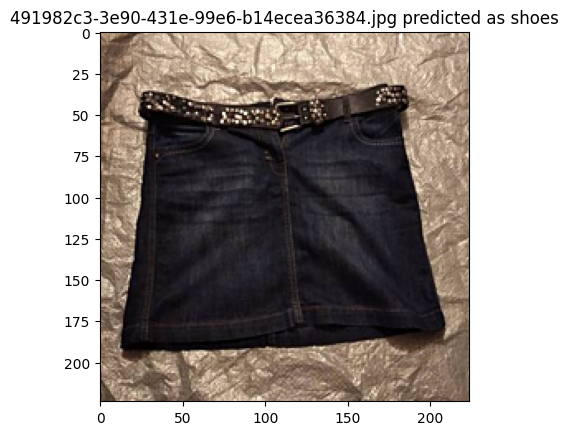

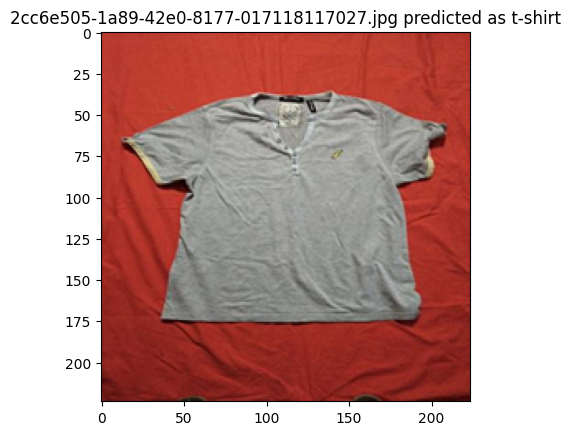

In [32]:
#path
dirs = [
    './dataset/dress',
    './dataset/hat',
    './dataset/longsleeve',
    './dataset/outwear',
    './dataset/pants',
    './dataset/shirt',
    './dataset/shoes',
    './dataset/shorts',
    './dataset/skirt',
    './dataset/t-shirt',
]

data = []

for dir_idx, dir in enumerate(dirs):
    _idx = 0
    folder_paths = []  # List untuk menyimpan path folder
    for ldir in os.listdir(dir):
        _label = ''
        _path = os.path.join(dir, ldir)
        _img = image_preproccess(load_image(_path), 1)
        _predictions = model.predict(npy.expand_dims(_img, 0), verbose=0)
        _state = npy.argmax(_predictions)

        _predictions_kids = model_kids.predict(npy.expand_dims(_img, 0), verbose=0)
        _state_kids = npy.argmax(_predictions_kids)
          
        if(_state < 1):
            _label = 'hat'
        elif(_state < 2):
            _label = 't-shirt'
        elif(_state < 3):
            _label = 'dress'
        elif(_state < 4):
            _label = 'longsleeve'
        elif(_state < 5):
            _label = 'outwear'
        elif(_state < 6):
            _label = 'pants'
        elif(_state < 7):
            _label = 'skirt'
        elif(_state < 8):
            _label = 'shoes'
        else:
            _label = 'shirt'

        if _idx == 1:
            plt.figure()
            plt.title(ldir + ' predicted as ' + _label)
            plt.imshow(_img)
        _idx += 1
        
        folder_paths.append(dir)  # Menambahkan path folder ke list
        data.append([ldir, dir, _label, npy.max(_predictions), _state, False if _state_kids > 1 else True, _state_kids])

df = pd.DataFrame(data, columns=["Image", "Folder Path", "label", "accurate", "state", "is kids fashion", "state kids"])
print(tabulate(df, headers="keys", tablefmt="psql"))